### **1. 토큰화**

#### **1-1. 문장 토큰화**

In [ ]:
# 라이브러리 다운로드
import nltk

nltk.dowmload('punkt')
nltk.dowmload('webtext')
nltk.dowmload('wordnet')
nltk.dowmload('stopwords')
nltk.dowmload('averaged_perceptron_tagger')

In [1]:
## 1. 문장 토큰화
para = "Hello, everyone. It's good to see you. Let's start our text mining class."

from nltk.tokenize import sent_tokenize

print(sent_tokenize(para)) # 사전 학습 모델 사용

['Hello, everyone.', "It's good to see you.", "Let's start our text mining class."]


In [5]:
import nltk

paragraph_french = """
Je t'ai demandé si tu m'aimais bien, Tu m'as répondu non.
Je t'ai demandé si j'étais jolie, Tu m'as répondu non.
Je t'ai demandé si j'étais dans ton coeur, Tu m'as répondu non.
"""

tokenizer = nltk.data.load('tokenizers/punkt/french.pickle') # 사전학습 모델 불러오기
sentences = tokenizer.tokenize(paragraph_french.strip())

print(sentences)

["Je t'ai demandé si tu m'aimais bien, Tu m'as répondu non.", "Je t'ai demandé si j'étais jolie, Tu m'as répondu non.", "Je t'ai demandé si j'étais dans ton coeur, Tu m'as répondu non."]


In [6]:
## 한글 사전학습 모델은 NLTK에 없음, 하지만 .을 기준으로 문장이 끝나기 때문에 문장 토큰화는 잘 이루어짐

para_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 이제 텍스트마이닝 클래스를 시작해봅시다!"
print(sent_tokenize(para_kor))

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 텍스트마이닝 클래스를 시작해봅시다!']


#### 1-2. 단어 토큰화

In [7]:
from nltk.tokenize import word_tokenize
print(word_tokenize(para))

['Hello', ',', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '.']


In [9]:
from nltk.tokenize import WordPunctTokenizer # 쉼표도 따로 분리
print(WordPunctTokenizer().tokenize(para))

['Hello', ',', 'everyone', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'our', 'text', 'mining', 'class', '.']


In [10]:
print(word_tokenize(para_kor))

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '텍스트마이닝', '클래스를', '시작해봅시다', '!']


한국어 텍스트를 정확하게 토큰화하기 위해서 다양한 방법이 필요하다.

단어 경계 : 공백과 같이 단어를 구분해주는 것
단어 분할 : 새로운 방법으로 단어를 분리

→ KoNLPy 사용

#### ※ 정규표현식을 사용하여 토큰화 가능

In [12]:
from nltk.tokenize import RegexpTokenizer


tokenizer =  RegexpTokenizer("[\w']+")
print(tokenizer.tokenize("Sorry, I can't go there."))

tokenizer =  RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Sorry, I can't go there."))

['Sorry', 'I', "can't", 'go', 'there']
['Sorry', 'I', 'can', 't', 'go', 'there']


In [14]:
sent = "Sorry, I can't go there."
tokenizer =  RegexpTokenizer("[\w']{3,}")
print(tokenizer.tokenize(sent.lower()))

['sorry', "can't", 'there']


#### 1-3. 노이즈와 불용어 제거

In [18]:
from nltk.corpus import stopwords
english_stops = set(stopwords.words("english"))

text = "Sorry, I couldn't go to movie yesterday."

tokenizer =  RegexpTokenizer("[\w']+")
tokens = tokenizer.tokenize(text.lower())

result = [word for word in tokens if word not in english_stops]

print(result)

['sorry', 'go', 'movie', 'yesterday']


In [19]:
my_stopwords = ['i', 'go', 'to']
result = [word for word in tokens if word not in my_stopwords]
print(result)

['sorry', "couldn't", 'movie', 'yesterday']


### 정규화

목적 : "가다", "갔다", "가는 중이다"와 같이 같은 단어이지만 형태가 다른 단어를 "가다"라는 기본형으로 만들어주는 과정

**[두 가지의 방법]**

1. 어간 추출
2. 표제어 추출


#### 2-1. 어간 추출

어형 : 단어의 형태
어간 : 어형 변화에서 변화하지 않는 부분

※ 어형 변화 : 동일한 어간을 가지고 동일한 품사를 유지하면서, 그 어미를 여러 가지 변화시켜 그에 따라 문법적 기능도 변화하는 현상

용언 : 문장 안에서 서술하는 구실을 하는 동사와 형용사

→ 변하지 않는 어간을 분리하는 작업

**<영어의 경우>**
포터 스테머, 랭카스터 스테머 사용


In [21]:
## 1. 포터스테머
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


In [23]:
para = "Hello, everyone. It's good to see you. Let's start our text mining class."
tokens = word_tokenize(para)
print(tokens)
result = [stemmer.stem(token) for token in tokens]
print(result)

['Hello', ',', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '.']
['hello', ',', 'everyon', '.', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'let', "'s", 'start', 'our', 'text', 'mine', 'class', '.']


In [25]:
## 2. 랭카스터 스테머
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookery cookbook


#### 2-2. 표제어 추출

단어의 기본형으로 변환하는 것

즉, 주어진 단어를 기본형으로 변환하는 것
어간 추출의 경우 동일하게 변형되는 않는 부분을 추출하지만,
표제어 추출은 사전에 있는 단어를 추출하는 것이다.

작다의 경우
어간 추출 : 작
표제어 추출 : 작다

In [31]:
from nltk.stem import WordNetLemmatizer # 표제어 추출기
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos = 'v')) # 품사 지정
print(lemmatizer.lemmatize('cookery')) # 사전에 있음
print(lemmatizer.lemmatize('cookbooks'))

cooking
cook
cookery
cookbook


### 품사 태깅

토큰화와 정규화 과정을 통해 나온 각 결과는 **형태소**이다.
형태소 : 의미를 가진 가장 작은 말의 단위

※ 형태소까지 분리할 것인지는 전적으로 분석을 수행하는 사람의 판단에 달려있다.
→ 형태소를 분리하지 않는다고 해도, 좋은 결과가 나올 수 있기 때문임

한글의 형태소 같은 경우, 동음이의어가 많고, 품사 자체도 복잡해 정확한 결과를 기대하기 어렵다.

**품사태깅**
형태소에 대해 품사를 파악해 부착하는 작업


In [34]:
tokens = word_tokenize("Hello, everyone. It's good to see you. Let's start our text mining class.")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), (',', ','), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('.', '.')]


In [37]:
# 품사 약어 확인
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [38]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


In [39]:
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', ',/,', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'see/VB', 'you/PRP', './.', 'Let/VB', "'s/POS", 'start/VB', 'our/PRP$', 'text/NN', 'mining/NN', 'class/NN', './.']


#### 한국어 품사 태깅

OKT 경우

morphs : 형태소 단위 분리
nouns : 형태소 단위 분리 후 명사 반환
pos : 형태소 단위 분리 후 품사를 부착해 반환

In [40]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [41]:
from konlpy.tag import Okt

t = Okt()

In [42]:
print('형태소:', t.morphs(sentence))
print()
print('명사:', t.nouns(sentence))
print()
print('품사 태깅 결과:', t.pos(sentence))

형태소: ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']

명사: ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']

품사 태깅 결과: [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상

### 워드클라우드

In [43]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ahyeo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [44]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [45]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print("#Nu of characters used : ", len(doc_alice))
print("#Text sample : ")
print(doc_alice[:500])

#Nu of characters used :  144395
#Text sample : 
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [49]:
tokens_alice = word_tokenize(doc_alice)
print("#Nu of characters used : ", len(tokens_alice))
print("#Text sample : ")
print(tokens_alice[:20])

#Nu of characters used :  33494
#Text sample : 
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [51]:
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [52]:
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [53]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [54]:
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

result_alice = [word for word in reg_tokens_alice if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [55]:
# 단어의 출현 빈도
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Num of used words: 2687
#Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

In [56]:
# 필요한 품사만 가져와 빈도 셈
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]
#print(my_words)

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Num of used words: 1726
#Top 20 high frequency words:
'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

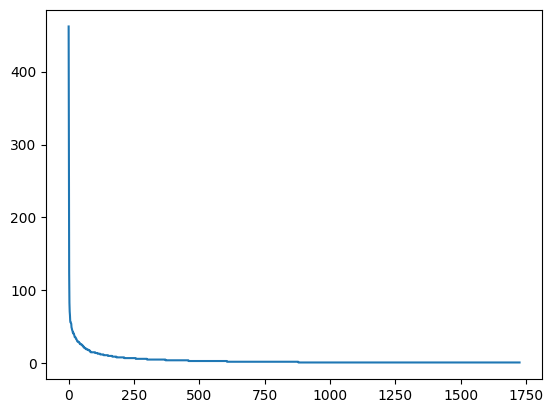

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [alice_word_count[key] for key in sorted_word_count] #정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
plt.plot(w)
plt.show()

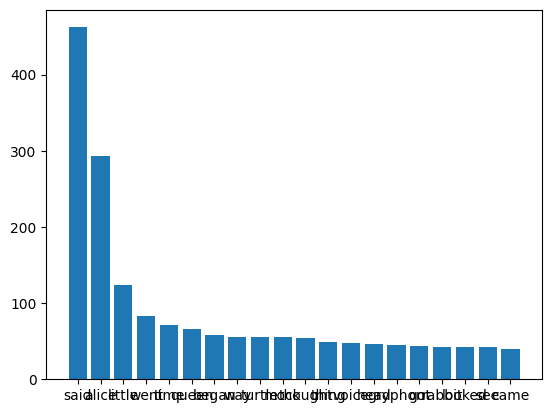

In [63]:
n = sorted_word_count[:20]
w = [alice_word_count[key] for key in n] # 빈도수 추출
plt.bar(range(len(n)),w,tick_label=n)
plt.show()

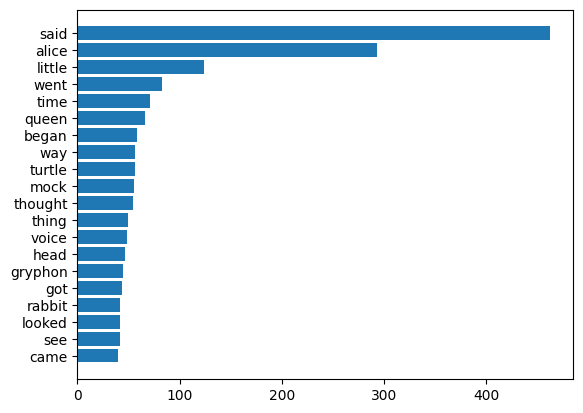

In [62]:
n = sorted_word_count[:20][::-1] #빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)),w,tick_label=n) #수평 막대그래프
plt.show()

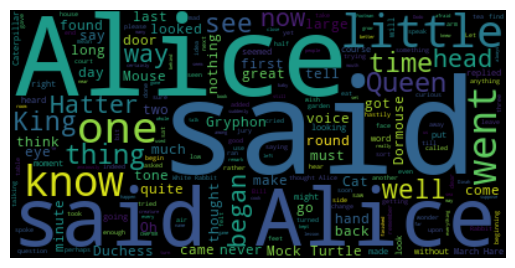

In [64]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [65]:
wordcloud.to_array().shape

(200, 400, 3)

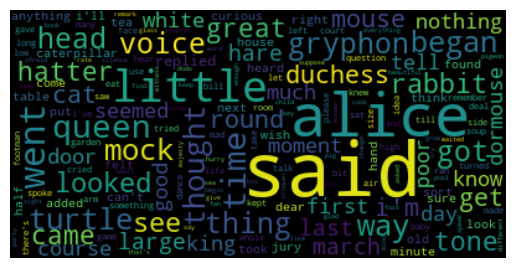

In [66]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

아래와 같이 이미지 안에 wordcloud 생성 가능

In [67]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open("alice_mask.png")) # 배경이미지를 불러와서 numpy array로 변환
wc = WordCloud(background_color="white", # 배경색 지정
               max_words=30, # 출력할 최대 단어 수
               mask=alice_mask, # 배경으로 사용할 이미지
               contour_width=3,  # 테두리선의 크기
               contour_color='steelblue') # 테두리선의 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("alice.png") # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'alice_mask.png'

#### 한국어 wordcloud

In [68]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) #가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [69]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) #형태소

print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 8796
#앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [70]:
tokens_const = t.nouns(const_doc) #명사만 추출
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [71]:
tokens_const = [token for token in tokens_const if len(token) > 1]
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


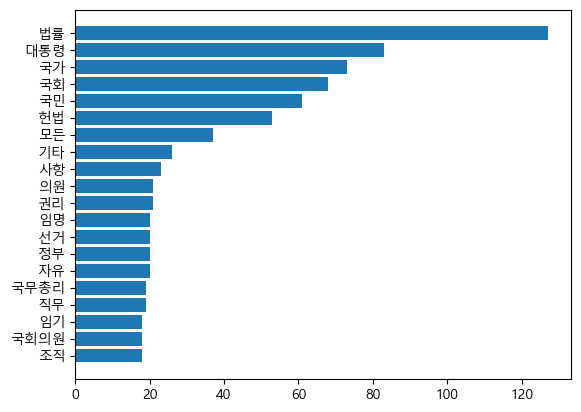

In [73]:
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:]) # 빈도수가 갈수록 증가하게 나타냄
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

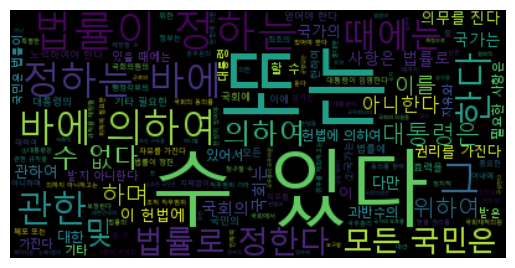

In [74]:
font_path = 'c:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(font_path = font_path).generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

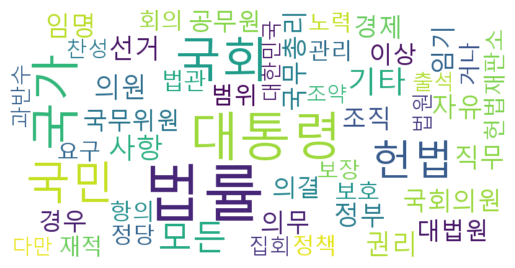

In [75]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #추출한 명사로 워드클라우드를 생성
# wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()